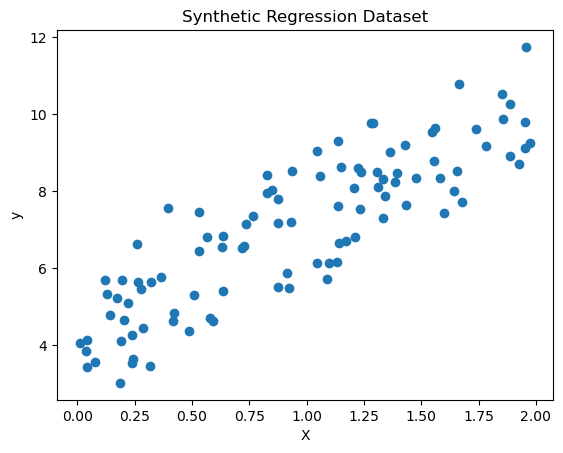

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Plot the dataset
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Synthetic Regression Dataset')
plt.show()

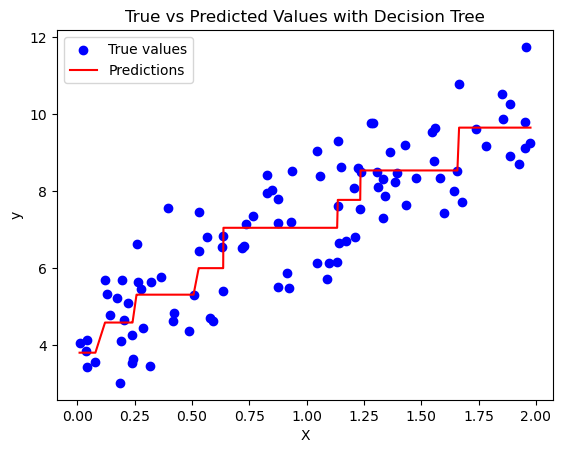

In [3]:
class DecisionTreeRegressor:
    def __init__(self, max_depth=3):
        self.max_depth = max_depth
        self.tree = None

    def fit(self, X, y):
        self.tree = self._build_tree(X, y, depth=0)

    def _build_tree(self, X, y, depth):
        num_samples, num_features = X.shape
        unique_y = np.unique(y)
        
        # If only one value or max depth is reached, return the mean
        if len(unique_y) == 1 or depth >= self.max_depth:
            return np.mean(y)

        # Initialize best split
        best_mse = float('inf')
        best_split = None
        best_left_X = None
        best_left_y = None
        best_right_X = None
        best_right_y = None

        # Try every feature and every split
        for feature in range(num_features):
            feature_values = np.unique(X[:, feature])
            for value in feature_values:
                left_mask = X[:, feature] <= value
                right_mask = X[:, feature] > value

                if np.any(left_mask) and np.any(right_mask):
                    left_X = X[left_mask]
                    right_X = X[right_mask]
                    left_y = y[left_mask]
                    right_y = y[right_mask]

                    # Compute mean squared error for the split
                    left_mse = np.mean((left_y - np.mean(left_y)) ** 2)
                    right_mse = np.mean((right_y - np.mean(right_y)) ** 2)
                    mse = (len(left_y) * left_mse + len(right_y) * right_mse) / num_samples

                    # Update the best split if the current one is better
                    if mse < best_mse:
                        best_mse = mse
                        best_split = (feature, value)
                        best_left_X = left_X
                        best_left_y = left_y
                        best_right_X = right_X
                        best_right_y = right_y

        # If no valid split, return the mean of y
        if best_split is None:
            return np.mean(y)

        # Recursively build the tree
        left_tree = self._build_tree(best_left_X, best_left_y, depth + 1)
        right_tree = self._build_tree(best_right_X, best_right_y, depth + 1)

        return (best_split, left_tree, right_tree)

    def predict(self, X):
        return np.array([self._predict_sample(x, self.tree) for x in X])

    def _predict_sample(self, x, tree):
        if isinstance(tree, (float, int)):
            return tree

        (split_feature, split_value), left_tree, right_tree = tree

        if x[split_feature] <= split_value:
            return self._predict_sample(x, left_tree)
        else:
            return self._predict_sample(x, right_tree)

# Train and test the model
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X, y)
y_pred = tree.predict(X)

# Plot the predictions
plt.scatter(X, y, color='blue', label='True values')
plt.plot(np.sort(X[:, 0]), [tree.predict(np.array([[x]]))[0] for x in np.sort(X[:, 0])], color='red', label='Predictions')
plt.xlabel('X')
plt.ylabel('y')
plt.title('True vs Predicted Values with Decision Tree')
plt.legend()
plt.show()

In [6]:
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(0)

# Generate synthetic data
n_samples = 100
X = np.linspace(0, 10, n_samples)
y = 2.5 * X + np.random.normal(0, 1, n_samples)  # Linear relation with some noise

# Create a DataFrame
data = pd.DataFrame({'Feature': X, 'Target': y})

# Display the first few rows of the dataset
print(data.head())

# Save to CSV (optional)
data.to_csv('simple_regression_data.csv', index=False)

   Feature    Target
0  0.00000  1.764052
1  0.10101  0.652682
2  0.20202  1.483788
3  0.30303  2.998469
4  0.40404  2.877659


In [7]:
data

,Feature,Target
0,0.00000,1.764052
1,0.10101,0.652682
2,0.20202,1.483788
3,0.30303,2.998469
4,0.40404,2.877659
...,...,...
95,9.59596,24.696472
96,9.69697,24.252924
97,9.79798,26.280820
98,9.89899,24.874387


In [8]:
import numpy as np
import pandas as pd

class DecisionTreeRegressor:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None

    def fit(self, X, y):
        self.tree = self._fit(X, y, depth=0)

    def _fit(self, X, y, depth):
        n_samples, n_features = X.shape
        unique_values = np.unique(X)
        
        # Calculate the mean value of the target variable
        mean_y = np.mean(y)
        
        # Stop if max_depth is reached or if all targets are the same
        if (self.max_depth and depth >= self.max_depth) or len(np.unique(y)) == 1:
            return mean_y
        
        # Find the best split
        best_split = None
        best_score = float('inf')
        best_left_y = None
        best_right_y = None
        
        for feature_index in range(n_features):
            feature_values = np.unique(X[:, feature_index])
            
            for value in feature_values:
                left_mask = X[:, feature_index] <= value
                right_mask = ~left_mask
                
                left_y = y[left_mask]
                right_y = y[right_mask]
                
                if len(left_y) == 0 or len(right_y) == 0:
                    continue
                
                left_mean = np.mean(left_y)
                right_mean = np.mean(right_y)
                
                left_variance = np.var(left_y)
                right_variance = np.var(right_y)
                
                # Calculate the weighted average of variances
                score = (len(left_y) * left_variance + len(right_y) * right_variance) / n_samples
                
                if score < best_score:
                    best_score = score
                    best_split = (feature_index, value)
                    best_left_y = left_y
                    best_right_y = right_y
        
        # If no split improves, return the mean value
        if best_split is None:
            return mean_y
        
        # Recursively build the left and right subtrees
        left_tree = self._fit(X[X[:, best_split[0]] <= best_split[1]], best_left_y, depth + 1)
        right_tree = self._fit(X[X[:, best_split[0]] > best_split[1]], best_right_y, depth + 1)
        
        return (best_split, left_tree, right_tree)

    def predict(self, X):
        return np.array([self._predict(x, self.tree) for x in X])

    def _predict(self, x, tree):
        if not isinstance(tree, tuple):
            return tree
        
        feature_index, value = tree[0]
        if x[feature_index] <= value:
            return self._predict(x, tree[1])
        else:
            return self._predict(x, tree[2])


# Example usage:
if __name__ == "__main__":
    # Generate some synthetic data
    np.random.seed(0)
    X = np.linspace(0, 10, 100).reshape(-1, 1)
    y = 2.5 * X.squeeze() + np.random.normal(0, 1, X.shape[0])

    # Create and train the model
    model = DecisionTreeRegressor(max_depth=3)
    model.fit(X, y)

    # Make predictions
    predictions = model.predict(X)
    
    # Display first few predictions
    print(predictions[:10])

[1.94665129 1.94665129 1.94665129 1.94665129 1.94665129 1.94665129
 1.94665129 1.94665129 1.94665129 1.94665129]


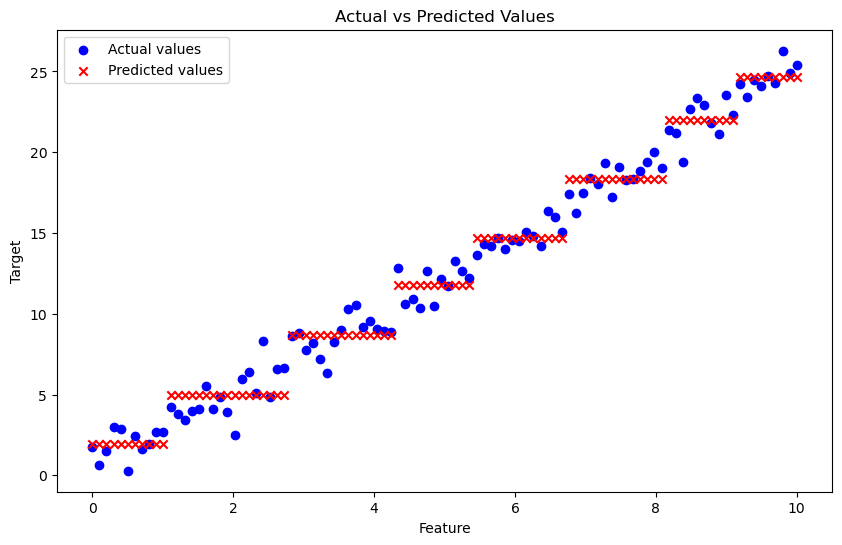

In [10]:
  # Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual values')
plt.scatter(X, predictions, color='red', label='Predicted values', marker='x')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

In [12]:
 # Display predictions and actual values
print("The predictions are:", " ".join(f"{val:.8f}" for val in predictions[:10]))
print("The actual values are:", " ".join(f"{val:.5f}" for val in y[:10]))

The predictions are: 1.94665129 1.94665129 1.94665129 1.94665129 1.94665129 1.94665129 1.94665129 1.94665129 1.94665129 1.94665129
The actual values are: 1.76405 0.65268 1.48379 2.99847 2.87766 0.28535 2.46524 1.61632 1.91698 2.68333
